## GENERAL APPLICATION OF MACHINE LEARNING IN SOFTWARE ENGINEERING

In this notebook, we proposed various machine learning model-based approaches for early and accurate network intrusion detection

# IMPORTING NECESSARY LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data_train = pd.read_csv("C:/Users/Abinaya/Downloads/Project/KDDTrain+.txt")# Loading the dataset | I have included the dataset along with this notebook. Please load it locally.

# DATA PREPROCESSING
## DATA EXPLORATION

In [7]:
data_train.head() #print first few rows of the dataset

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
data_train.info() #print the datatype of each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [9]:
data_train.describe() #generate summary statistics of the numerical columns

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.0,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.0,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


# DATA CLEANING

In [10]:
data_train.isnull().sum() #calculate the number of missing values

0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.00        0
0.00.1      0
0.00.2      0
0.00.3      0
1.00        0
0.00.4      0
0.00.5      0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.00.6      0
0.00.7      0
0.00.8      0
0.05        0
0.00.9      0
normal      0
20          0
dtype: int64

In [11]:
data_train.duplicated().sum() #finding the duplicates in our dataset

0

In [12]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [13]:
data_train.columns = columns #as our dataset doesn't have column names we have included that after analysing various papers.

In [14]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'}) #print numerical columns

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480802,4021285.112110,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [15]:
data_train.head() #print the first few rows of the dataset.

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [16]:
# training the data for binary classification.
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

This will create a figure with two subplots. The first subplot will show the value counts for the 'protocol_type' column, and the second subplot will show the value counts for the 'outcome' column in our data_train DataFrame.

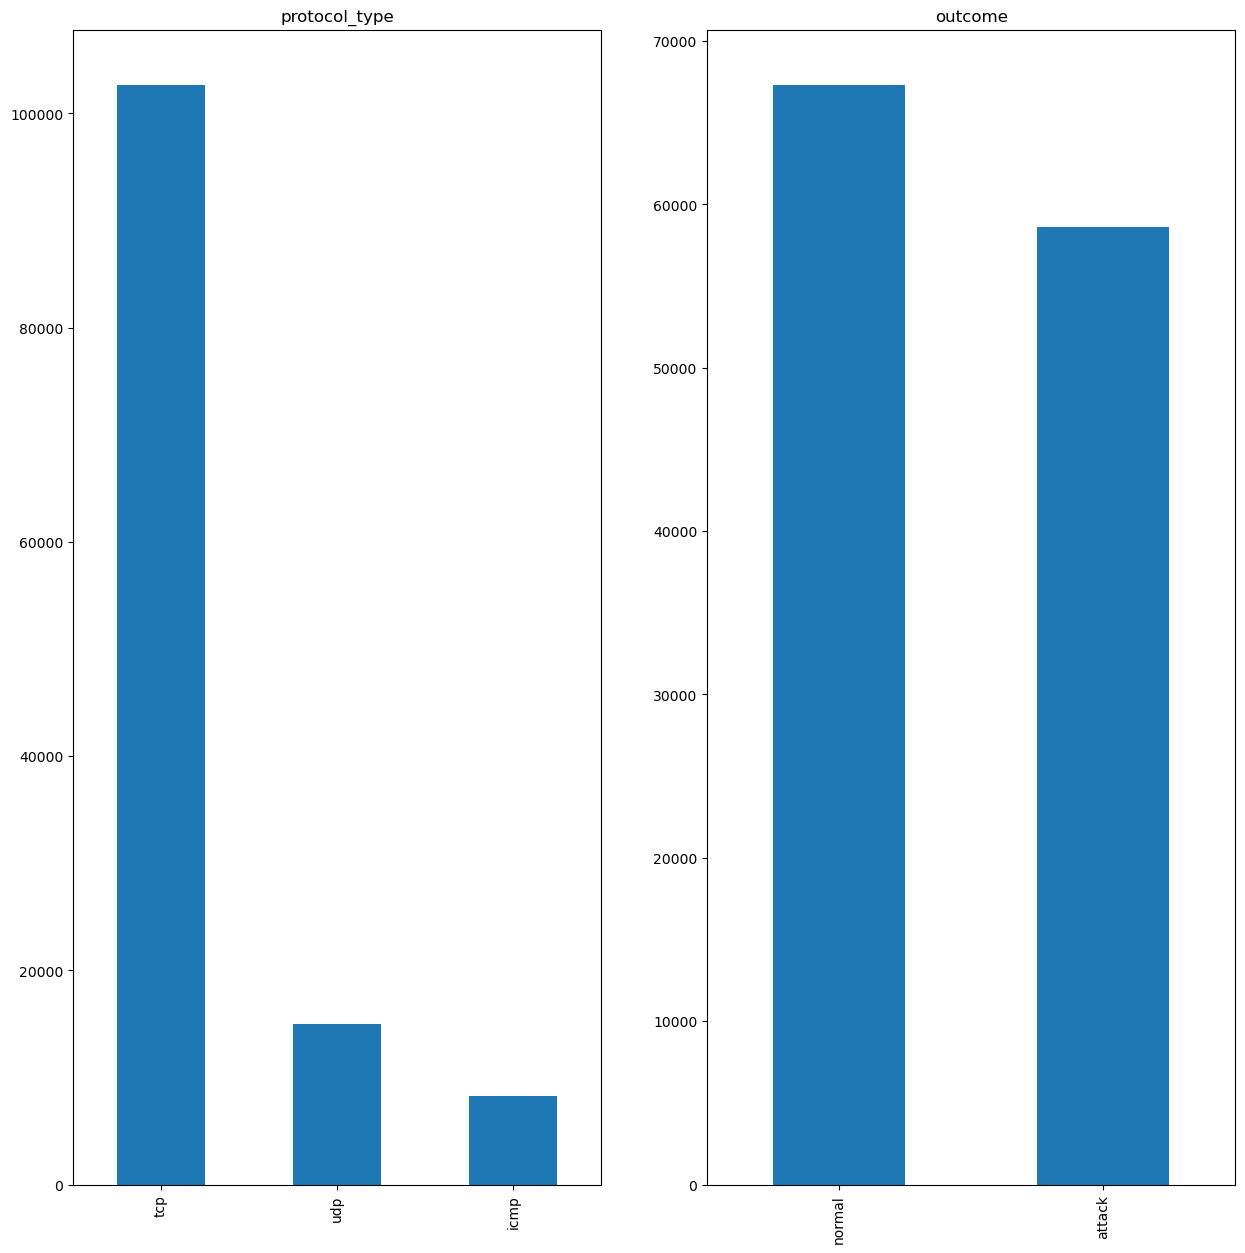

In [17]:
import matplotlib.pyplot as plt #library used to create visualization in python

def bar_plot(df, cols_list, rows, cols):
  fig, axes = plt.subplots(rows, cols)
  for ax, col in zip(axes.ravel(), cols_list):
    df[col].value_counts().plot(ax=ax, kind='bar', figsize=(15, 15), fontsize=10)
    ax.set_title(str(col), fontsize = 12)
  plt.show()

bar_plot(data_train, ['protocol_type', 'outcome'], 1, 2)


In [18]:
#For bettwe visualization
import matplotlib.pyplot as plt 
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

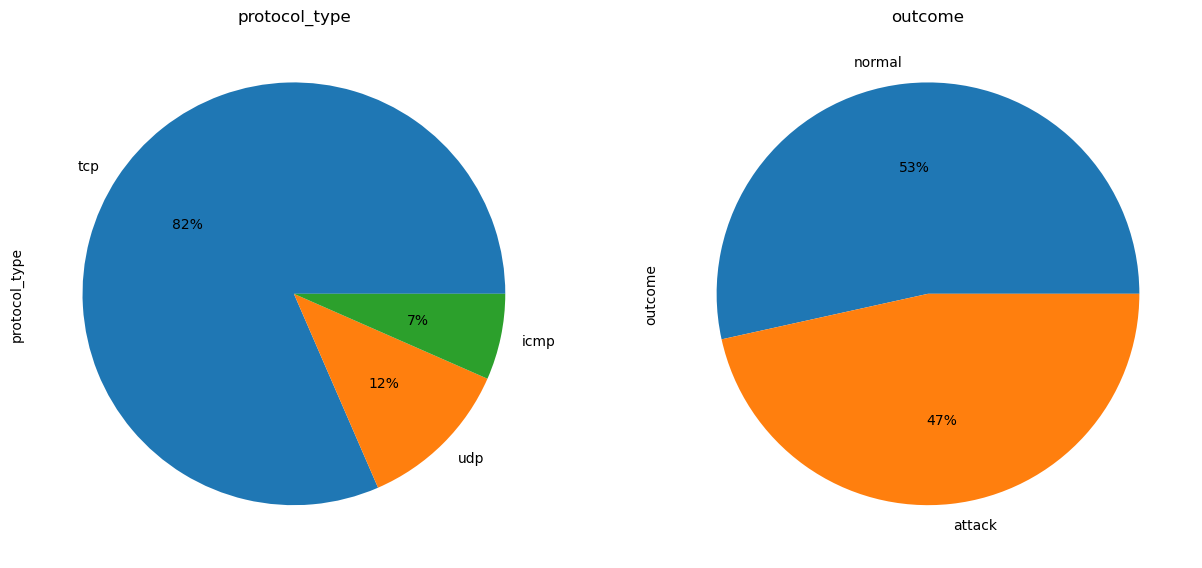

In [19]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

# SCALING AND ENCODING
we chose Robust scaler bacause it useful when dealing with data that conatins outliers. Traditional scalers re sensitive to outliers.


In [20]:
#df_num - pandas DataFrame containing numerical columns for scaling,
#cols - list of column names within df_num to be scaled.

def Scaling(df_num, cols): 
    std_scaler = RobustScaler()  #creates an instance of the RobustScaler class. 
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [21]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    #The below code applies one-hot encoding to specified categorical columns, creating new binary columns for each unique value.
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag']) #
    return dataframe

In [22]:
scaled_train = preprocess(data_train) #scaled_train DataFrame now contains preprocessed data suitable for training models.

# DIMENSIONALITY REDUCTION WITH PCA
![PCA](PCA.jpeg)

## DATA SPLITTING

In [23]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=20) 
pca = pca.fit(x)  # applies PCA model to the feature data (x),identifying the components that explain the most variance in the data.
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #allocates 20% of the data for testing
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 20


## Defining a function for Prediction Latency

In [24]:
def measure_prediction_latency(model, X_test): #X_test - test set containing the data points
    start_time = time.time()
    model.predict(X_test)
    prediction_latency = (time.time() - start_time) / len(X_test)
    return prediction_latency  # returns the calculated average prediction latency as the output of the function.

## Defining a function to predict detection time of the ML models

In [25]:
from memory_profiler import profile
@profile
def measure_training_time(model, X_train, y_train):  #X_train- training data features.y_train-training data target variable.
    start_time = time.time() #captures the current system time using time.time from time library.
    model.fit(X_train, y_train) #performd actual training of the model on the provided training data.
    training_time = time.time() - start_time
    return training_time, memory_usage

## Model Evaluation Function: analyse_model_results


In [26]:
import time
import psutil  

# Defining a function to measure prediction latency
def measure_prediction_latency(model, X_test):
    start_time = time.time()
    model.predict(X_test)
    prediction_latency = (time.time() - start_time) / len(X_test)
    return prediction_latency

# Defining a function to measure memory usage
def measure_memory_usage():
    process = psutil.Process()
    memory_usage = process.memory_info().rss / (1024 ** 2)  # Memory usage in MB
    return memory_usage

kernal_evals = dict()

def analyse_model_results(model, name, X_train, X_test, y_train, y_test):
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    
    memory_before_training = measure_memory_usage()  # Measures the memory usage before training
    
    
    detection_start_time = time.time()                # Measures the detection time
    y_pred_train = model.predict(X_train)
    detection_time = time.time() - detection_start_time
    
    
    prediction_latency = measure_prediction_latency(model, X_test)  # Measures the prediction latency
    
    
    memory_after_training = measure_memory_usage() # Measures memory usage after training and detection
    
    
    memory_usage_increase = memory_after_training - memory_before_training # Calculates memory usage increase during training and detection
    
    # Evaluates model performance
    
    #y_test: These are the true labels for the testing data.
    #model.predict(X_test) generates predictions for the testing data using the trained model.
    #y_train-true labels for training data.
    #y_pred_train-predicted labels for training data
    
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test)) #calculates the accuracy for the testing se
    
    train_precision = metrics.precision_score(y_train, y_pred_train)
    test_precision = metrics.precision_score(y_test, model.predict(X_test)) #calculates precision for the testing set
    
    train_recall = metrics.recall_score(y_train, y_pred_train)
    test_recall = metrics.recall_score(y_test, model.predict(X_test)) #calculates recall for the testing set
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    
    # Print evaluation metrics
    print("Model:", name)
    print("Training Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Training Precision:", train_precision)
    print("Test Precision:", test_precision)
    print("Training Recall:", train_recall)
    print("Test Recall:", test_recall)
    print("Detection Time:", detection_time)
    print("Prediction Latency:", prediction_latency)
    print("Memory Usage Increase (MB):", memory_usage_increase)

    # Displays confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'attack'])
    cm_display.plot(cmap = "Greens")

# MODELING

# CLASSIFICATION MODELS

## 1.Logistic Regression

Logistic Regression is a widely used classification algorithm suitable for NIDS.It excels at tasks involving binary prediction, making it ideal for classifying network traffic as either normal or attack

Model Function:
The Logistic Regression model utilizes a sigmoid function i.e logistic function to map the linear combination of weighted features to a probability between 0 and 1. The formula for the sigmoid function is:

$$h(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}.$$
h(x)-predicted probability of an attack (dependent variable).
xᵢ (i = 1 to n)-independent variables, i.e features of network traffic
βᵢ (i = 0 to n)-model coefficients estimated during training.

A threshold value (e.g., 0.5) is used to classify traffic. If the predicted probability h(x) is greater than the threshold, it's considered an attack; otherwise, it's classified as normal.

Model: Logistic Regression
Training Accuracy: 0.8799229983031842
Test Accuracy: 0.8766818813256598
Training Precision: 0.8395931142410016
Test Precision: 0.8377056814653834
Training Recall: 0.9166826851199248
Test Recall: 0.9139639258192904
Detection Time: 0.02837371826171875
Prediction Latency: 2.778411550307988e-07
Memory Usage Increase (MB): 1.3515625


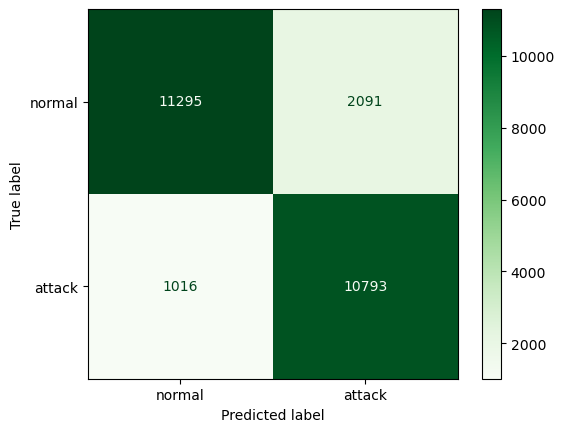

In [27]:
#x_train-This is the training data containing features.
#y_train-These are the corresponding target labels for the training data.
#T.fit method trains the model 
lr = LogisticRegression().fit(x_train, y_train)
analyse_model_results(lr, "Logistic Regression", x_train, x_test, y_train, y_test) #calls a function named analyse_model_results. This function performs various analyses on the trained model (lr).

## 2.Naive Bayes

Naive Bayes is a probabilistic classifier well-suited for Network Intrusion Detection Systems (NIDS) due to its efficiency and interpretability. It works under the assumption of independence between features, simplifying calculations and providing insights into the relative importance of each feature for attack detection.

The Gaussian Naive Bayes model calculates the posterior probability of a data point belonging to a class (normal vs. attack) using the following formula:

$$P(\text{Class} | X) = P(X_1 | \text{Class}) \cdot P(X_2 | \text{Class}) \cdot ... \cdot P(X_n | \text{Class})$$

Here:

- P(Class | X): Probability of belonging to the class given features X (normal or attack probability).
- P(X_i | Class): Probability of observing feature X_i given the class (individual feature contributions).
- X_1, X_2, ..., X_n: Independent features (network traffic characteristics).


Model: GaussianNB
Training Accuracy: 0.9180269307480874
Test Accuracy: 0.9160547727723755
Training Precision: 0.9262657528189255
Test Precision: 0.9253246753246753
Training Recall: 0.8947907990004486
Test Recall: 0.8929629943263613
Detection Time: 0.3553731441497803
Prediction Latency: 3.89288001222302e-06
Memory Usage Increase (MB): 0.76953125


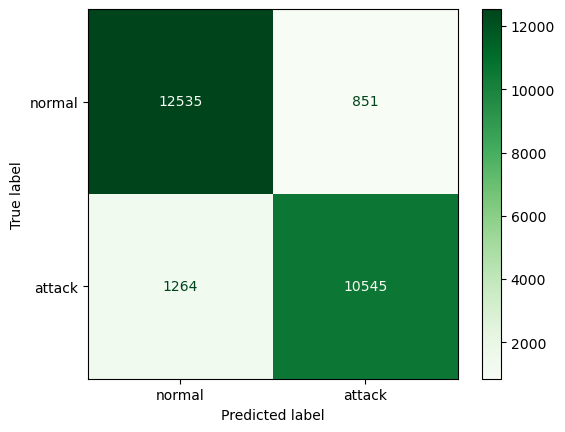

In [28]:
#Naive Bayes Classifier
gnb = GaussianNB().fit(x_train, y_train)
analyse_model_results(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

## 3.Linear SVC
Linear Support Vector Classification is a powerful algorithm within the Support Vector Machine (SVM) family, well-suited for NIDS due to its ability to find the optimal hyperplane that separates normal traffic from attack traffic in the high-dimensional feature space of network data

The Linear SVC model utilizes a decision function to classify new data points. A simplified form of this function is:

$$f(x) = w^T \cdot x + b$$

- f(x): Predicted label (normal or attack) for a new data point x.
- w: Weight vector that defines the hyperplane.
- x: Feature vector of the new data point.
- b: Bias term that shifts the hyperplane.

The sign of f(x) determines the class prediction: positive for attack and negative for normal traffic.
A data point is classified as normal if f(x) is negative and as attack if f(x) is positive.

In [29]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

Model: Linear SVC(LBasedImpl)
Training Accuracy: 0.9732974785913453
Test Accuracy: 0.9714625917840841
Training Precision: 0.9822950819672132
Test Precision: 0.9793395573997233
Training Recall: 0.9598257192285513
Test Recall: 0.9593530358201372
Detection Time: 0.030959367752075195
Prediction Latency: 3.9688484326646686e-07
Memory Usage Increase (MB): 1.83984375


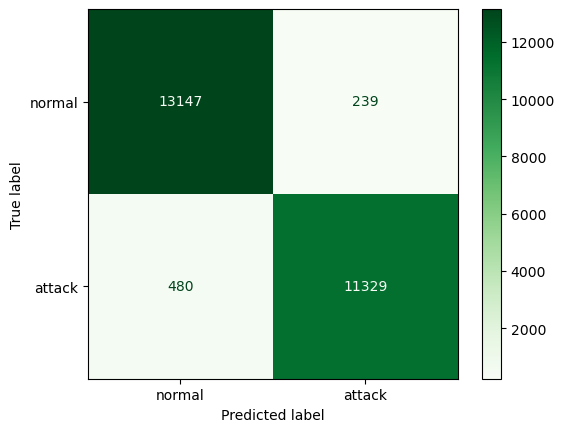

In [30]:
analyse_model_results(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

## 4.Decision Tree

The Decision Tree Classifier (DT) is a powerful classification algorithm well-suited for NIDS due to its interpretability and ability to handle both continuous and categorical features. It builds a tree-like structure where each node represents a feature and each branch represents a decision based on the feature value.

The Decision Tree Classifier makes decisions based on a series of rules at each node of the tree. A simplified form of a decision rule can be expressed as:

$$if \text{Feature}_i \leq \text{Threshold} \text{ then Class}_A$$
$$else \text{Class}_B$$

- Feature_i: Feature used for the split at the current node.
- Threshold: Splitting threshold on the feature value.
- Class_A, Class_B: Predicted classes based on the decision (e.g., normal or attack).

The tree structure is built by recursively applying such rules at each node, ultimately classifying new data points based on the path they take through the tree.


Model: DecisionTreeClassifier
Training Accuracy: 0.9999404626055548
Test Accuracy: 0.9986108354832308
Training Precision: 1.0
Test Precision: 0.9985602981029811
Training Recall: 0.9998718523739347
Test Recall: 0.9984757388432551
Detection Time: 0.04621767997741699
Prediction Latency: 4.778496919583886e-07
Memory Usage Increase (MB): 1.453125


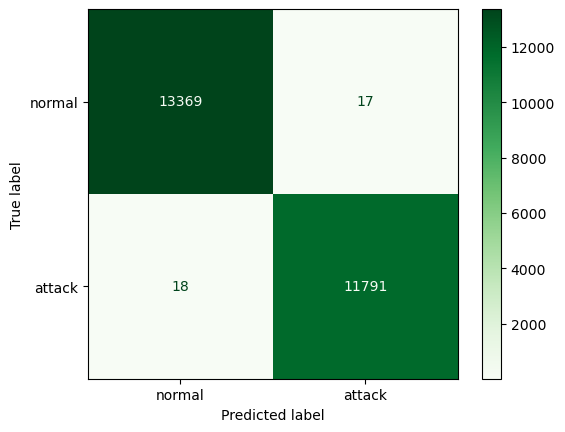

In [31]:
#decision tree
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
analyse_model_results(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

# Feature Importance Visualization
The below code helps us understand which features are most influential in decision tree model's predictions by visualizing their relative importances. is_host_login" is the highest bar in the feature importance graph suggests that this feature has the greatest impact on the predictions made by decision tree model (tdt).

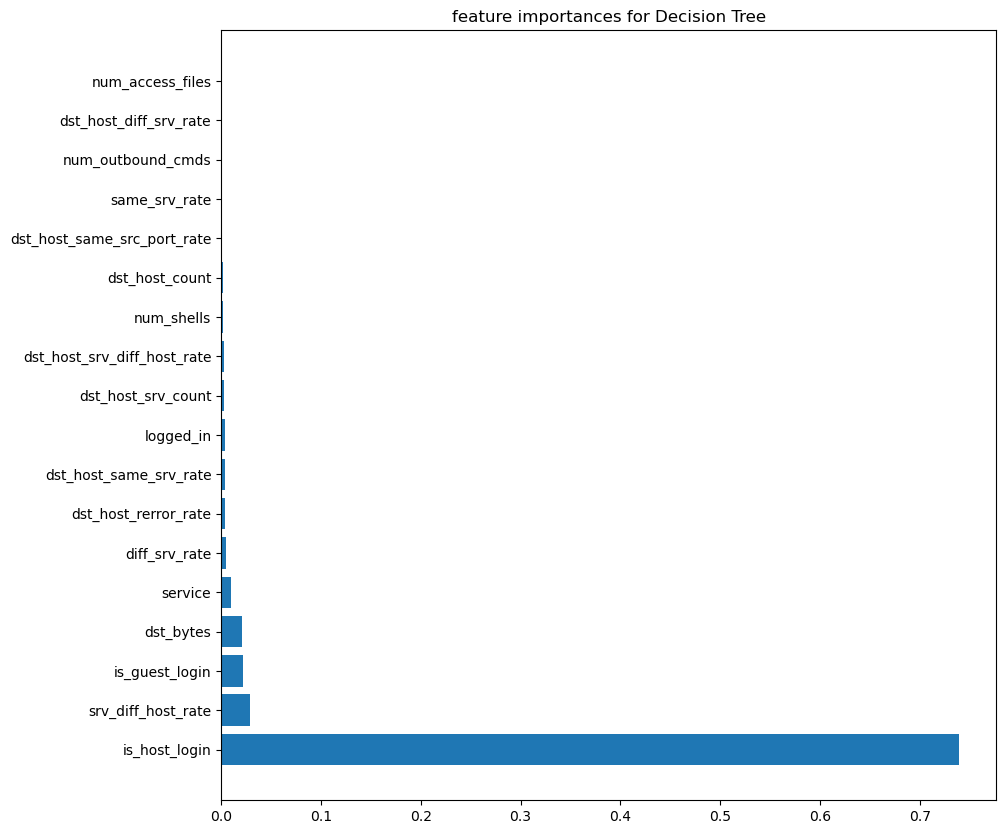

In [36]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Shows all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)


## 5.RandomForest

The Random Forest Classifier (RF) is well-suited for Network Intrusion Detection Systems  due to its ability to handle complex data patterns and improve generalization performance over a single decision tree. It combines predictions from multiple Decision Tree models (trained on different subsets of features) to create a more robust classifier.

$$Final \text{Class} = \text{Majority Vote} (\text{Tree}_1(x), \text{Tree}_2(x), ..., \text{Tree}_n(x))$$

- x: New data point to be classified.
- Tree_i(x): Prediction (class) made by the i-th tree in the forest for data point x.
- Majority Vote: The class receiving the most votes from individual trees becomes the final prediction.

The Random Forest model leverages these individual tree predictions to create a more robust classifier.


Model: RandomForestClassifier
Training Accuracy: 0.9999404626055548
Test Accuracy: 0.9988489779718198
Training Precision: 0.999957282299921
Test Precision: 0.9994911804613297
Training Recall: 0.9999145682492898
Test Recall: 0.9980523329663816
Detection Time: 1.1441876888275146
Prediction Latency: 1.112403650088877e-05
Memory Usage Increase (MB): 1.05859375


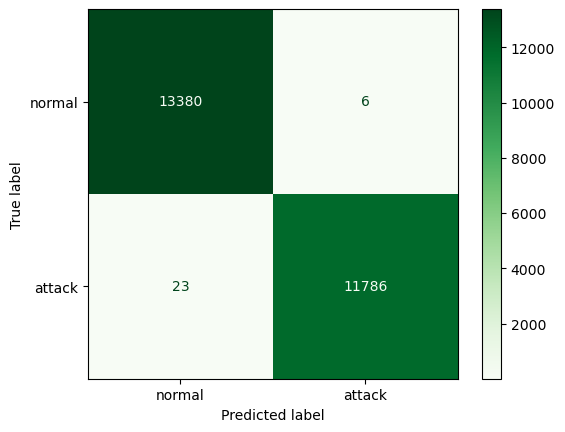

In [37]:
rf = RandomForestClassifier().fit(x_train, y_train)
analyse_model_results(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

## 6.K-Nearest Neighbors
KNN calculates the distance (e.g., Euclidean distance) between a new data point and all data points in the training set.
It identifies the k data points from the training set closest to the new data point The class label (normal or attack) that appears most frequently among the k nearest neighbors becomes the predicted class(majority vote) for the new data point.
The K-Nearest Neighbors (KNN) algorithm classifies data points based on their nearest neighbors. A simplified formula for a commonly used distance metric (Euclidean distance) is:

$$d(x, y) = \sqrt{\sum{(x_i - y_i)^2} \text{ for } i \text{ in features}}$$

- d(x, y): Distance between data points x and y.
- x_i: Feature value of the i-th feature in data point x.
- y_i: Feature value of the i-th feature in data point y.
- features: All features considered for classification.

The KNN model utilizes this distance measure to identify nearest neighbors and perform classification based on majority vote from those neighbors.



![KNN](KNN.jpeg)

Model: KNeighborsClassifier
Training Accuracy: 0.9905236313841452
Test Accuracy: 0.9893629688430244
Training Precision: 0.9922512234910277
Test Precision: 0.9905636317266003
Training Recall: 0.9873133850195425
Test Recall: 0.9867050554661698
Detection Time: 54.615591287612915
Prediction Latency: 0.0006367017598728454
Memory Usage Increase (MB): -6.1640625


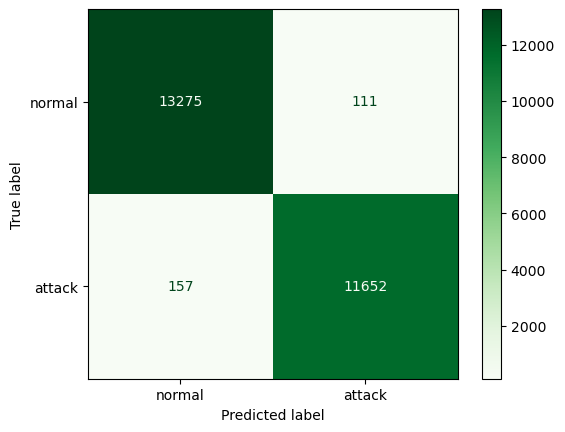

In [38]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
analyse_model_results(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

In [39]:
#prints the shapes of the training features (x_train) and training labels (y_train) for understanding purpose.
print(x_train.shape)
print(y_train.shape)


(100777, 122)
(100777,)


## Performance analysis function for Isolation forest

In [40]:
import os
import psutil
import time
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

def analyse_isolation_forest_results(model, X_train, X_test, y_test):
    # Measures detection time
    start_time_detection = time.time()
    predictions = model.predict(X_test)
    detection_time = time.time() - start_time_detection
    
    # Measures prediction latency
    start_time_prediction = time.time()
    predictions_binary = np.where(predictions == 1, 0, 1)
    prediction_latency = time.time() - start_time_prediction
    
    # Calculates accuracy
    accuracy = accuracy_score(y_test, predictions_binary)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Displays classification report
    print("\nClassification Report:")
    print(classification_report(y_test, predictions_binary, target_names=['normal', 'attack']))
    
    # Displays confusion matrix
    cm = confusion_matrix(y_test, predictions_binary)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'attack'])
    
    # Plost confusion matrix
    fig, ax = plt.subplots(figsize=(6,6))
    cm_display.plot(ax=ax, cmap="Greens")
    plt.show()
    
    # Measure memory usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    
    print(f"Detection Time: {detection_time:.6f} seconds")
    print(f"Prediction Latency: {prediction_latency:.6f} seconds")
    print(f"Memory Usage: {memory_usage:.2f} MB"


## 7.IsolationForest

Isolation Forest (IF) is an anomaly detection algorithm due to its ability to identify outliers representing potential attacks in the network traffic data. It isolates data points that are likely to be anomalies by randomly partitioning the data space and measuring the number of splits needed to isolate each data point.

Accuracy: 0.53

Classification Report:
              precision    recall  f1-score   support

      normal       0.53      1.00      0.69     13386
      attack       0.55      0.00      0.00     11809

    accuracy                           0.53     25195
   macro avg       0.54      0.50      0.35     25195
weighted avg       0.54      0.53      0.37     25195



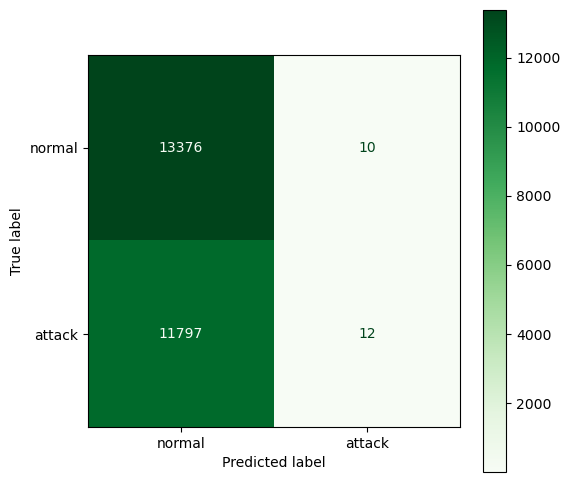

Detection Time: 2.418435 seconds
Prediction Latency: 0.000000 seconds
Memory Usage: 772.50 MB


In [41]:
from sklearn.ensemble import IsolationForest

# Create and fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, random_state=42)
iso_forest.fit(x_train)

# Analyzes the results
analyse_isolation_forest_results(iso_forest, x_train, x_test, y_test)


## Training and Test Accuracy visualization of Classification Models

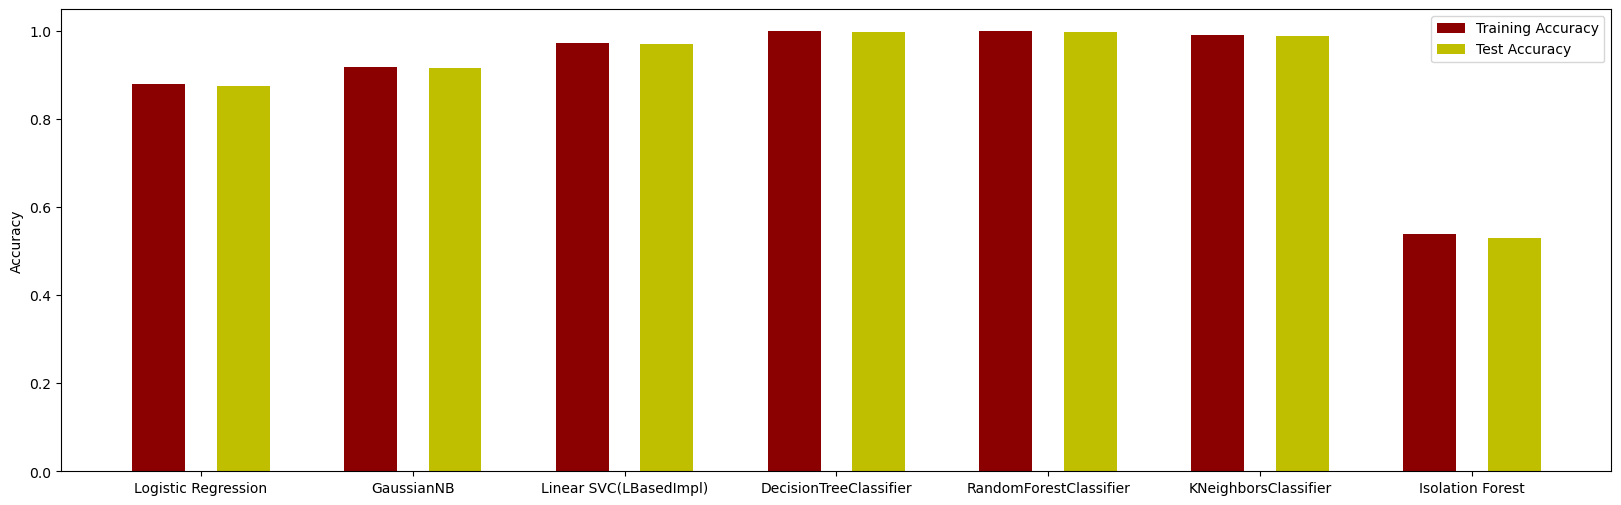

In [42]:
kernal_evals['Isolation Forest'] = [0.54, 0.53, 0.55, 0.53, 0.00, 0.50]  

# Plotting the bar chart with all the classification models
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

In [43]:
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'GaussianNB',  
              'Linear SVC(LBasedImpl)', 'DecisionTreeClassifier', 'RandomForestClassifier', 
              'KNeighborsClassifier', 'Isolation Forest' ],
    'Test Accuracy': [0.8767, 0.9161,  0.9696, 0.9986, 0.9988, 0.9894, 0.53, ],
    'Precision': [0.8377, 0.9253, 0.9638, 0.9986, 0.9995, 0.9906, '-'],
    'Recall': [0.9140, 0.8930,  0.9715, 0.9984, 0.9981, 0.9867, '-'],
    'F1 Score': [0.843, 0.925,0.962, 0.999, 0.999, 0.990, 0.69],
    'Detection Time (s)': [0.0370, 0.3650,  0.0446, 0.1084, 1.5535, 43.5236, 3.1209],
    'Prediction Latency (s)': [4.778e-07, 3.372e-06,  4.761e-07, 1.191e-06, 1.519e-05, 0.0004, 0.0],
    'Memory Usage Increase (MB)': [0.0195, 0.0,  2.8867, 0.1914, 0.0039, 5.9375, 660.0]
}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(data)

# Printa the DataFrame
print(df)

                    Model  Test Accuracy Precision  Recall  F1 Score  \
0     Logistic Regression         0.8767    0.8377   0.914     0.843   
1              GaussianNB         0.9161    0.9253   0.893     0.925   
2  Linear SVC(LBasedImpl)         0.9696    0.9638  0.9715     0.962   
3  DecisionTreeClassifier         0.9986    0.9986  0.9984     0.999   
4  RandomForestClassifier         0.9988    0.9995  0.9981     0.999   
5    KNeighborsClassifier         0.9894    0.9906  0.9867     0.990   
6        Isolation Forest         0.5300         -       -     0.690   

   Detection Time (s)  Prediction Latency (s)  Memory Usage Increase (MB)  
0              0.0370            4.778000e-07                      0.0195  
1              0.3650            3.372000e-06                      0.0000  
2              0.0446            4.761000e-07                      2.8867  
3              0.1084            1.191000e-06                      0.1914  
4              1.5535            1.519000e-

# ENSEMBLE LEARNING MODELS

The Ensemble Learning model is a powerful machine learning technique well-suited for Network Intrusion Detection Systems (NIDS) due to its ability to handle complex data patterns and improve accuracy over a single decision tree. It works on the core principle of sequentially building an ensemble of weak decision trees, where each tree learns from the errors of the previous one, ultimately leading to a more robust classifier.


# 1.Gradient Boosting Classifier

GBC starts with a simple model, a weak learner (simple decision tree).It iteratively fits additional decision trees to the training data, focusing on correcting the errors made by the previous trees.The final prediction(ensemble prediction) is made by combining the predictions from all the trees in the ensemble using a weighted voting scheme.A simplified form representing the weighted ensemble prediction is:

$$Final \text{ Prediction} = w_1 \cdot \text{Tree}_1(x) + w_2 \cdot \text{Tree}_2(x) + ... + w_n \cdot \text{Tree}_n(x)$$

- x: New data point to be classified.
- Tree_i(x): Prediction (class) made by the i-th tree in the ensemble for data point x.
- w_i: Weight assigned to the i-th tree based on its contribution to reducing errors.

The GBC model leverages these weighted individual tree predictions to create a more robust classifier.


![GBM Image](GBM_new.jpeg)

Model: Gradient Boosting Classifier
Training Accuracy: 0.9959316113795806
Test Accuracy: 0.9950386981543957
Training Precision: 0.9959393900536428
Test Precision: 0.9957569585879158
Training Recall: 0.9953012537109417
Test Recall: 0.9936489118468964
Detection Time: 0.4268074035644531
Prediction Latency: 3.578407846289179e-06
Memory Usage Increase (MB): 3.85546875


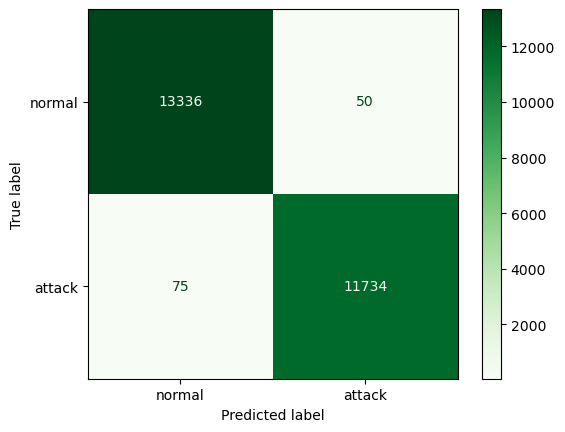

In [51]:
gb_classifier = GradientBoostingClassifier()
analyse_model_results(gb_classifier, "Gradient Boosting Classifier", x_train, x_test, y_train, y_test)

 ## 2.XGBClassifier
 
The XGBoost Classifier is a powerful machine learning technique based on gradient boostingdue to its efficiency, scalability, and ability to handle complex data patterns. It builds a highly optimized ensemble of decision trees, achieving superior performance compared to traditional gradient boosting algorithms.

XGBoost builds an ensemble of decision trees sequentially, with each tree learning from the errors of the previous ones(same bcore principle of Ensemble models).XGBoost have Level wise growth which means it splits in each and every feature.It incorporates regularization techniques to prevent overfitting and improve the generalization performance of the model.XGBoost encourages sparse trees, meaning most splits only consider a few features, leading to better model interpretability compared to dense models.A simplified form representing the weighted ensemble prediction with regularization is:

$$Final \text{ Prediction} = w_1 \cdot \text{Tree}_1(x) + w_2 \cdot \text{Tree}_2(x) + ... + w_n \cdot \text{Tree}_n(x) + \Omega(f)$$

- x: New data point to be classified.
- Tree_i(x): Prediction (class) made by the i-th tree in the ensemble for data point x.
- w_i: Weight assigned to the i-th tree based on its contribution to reducing errors.
- Ω(f): Regularization term penalizing model complexity (f represents the model function).

The XGBoost model utilizes these weighted individual tree predictions while incorporating a penalty for model complexity, leading to a more robust and generalizable classifier.


![XGBoost](XGBoost.jpeg)

Model: XGBoost Classifier
Training Accuracy: 0.9998710023120355
Test Accuracy: 0.9990871204604088
Training Precision: 0.9998291474457544
Test Precision: 0.9993221487883409
Training Recall: 0.9998932103116123
Test Recall: 0.9987297823693793
Detection Time: 0.06856060028076172
Prediction Latency: 6.748963310785251e-07
Memory Usage Increase (MB): 1.5859375


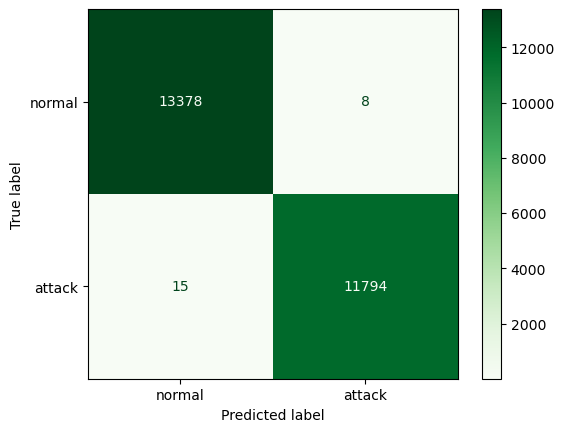

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
#Initialization XGBClassifier.
xgb_classifier = XGBClassifier()

# Training the model using .fit methos
xgb_classifier.fit(x_train, y_train)

# Prediction on the test set
y_pred = xgb_classifier.predict(x_test)

# Calling analyse_model_results function
analyse_model_results(xgb_classifier, "XGBoost Classifier", x_train, x_test, y_train, y_test)

## 3.CatBoost

CatBoost works on core principle of Ensemble Models.efficiently encodes categorical features for inclusion in the boosting process.It builds an ensemble of decision trees in a sequential manner, ordering features for splitting and focusing on improving previous trees' weaknesses.The model incorporates regularization techniques to control model complexity and enhance generalization.

$$Final \text{ Prediction} = w_1 \cdot \text{Tree}_1(x) + w_2 \cdot \text{Tree}_2(x) + ... + w_n \cdot \text{Tree}_n(x) + \Omega(f)$$

- x: New data point to be classified.
- Tree_i(x): Prediction (class) made by the i-th tree in the ensemble for data point x.
- w_i: Weight assigned to the i-th tree based on its contribution to reducing errors.
- Ω(f): Regularization term penalizing model complexity (f represents the model function).

CatBoost Uniqueness:
Handles Categorical Features Effectively: Unlike traditional gradient boosting algorithms, CatBoost excels at handling categorical features, which are often prevalent in network traffic data. It utilizes efficient encoding techniques to represent categorical features for optimal model performance.
Ordered Boosting: CatBoost implements Ordered Boosting, where features are sorted based on their information gain for splitting, leading to potentially more accurate models compared to traditional gradient boosting.
Regularization Techniques: Similar to XGBoost, CatBoost incorporates built-in regularization to prevent overfitting and improve model generalization.

![CatBoost](CatBoost.png)

0:	learn: 0.5136469	total: 206ms	remaining: 3m 25s
1:	learn: 0.3772243	total: 247ms	remaining: 2m 3s
2:	learn: 0.2891070	total: 281ms	remaining: 1m 33s
3:	learn: 0.2329393	total: 307ms	remaining: 1m 16s
4:	learn: 0.1781291	total: 335ms	remaining: 1m 6s
5:	learn: 0.1552234	total: 365ms	remaining: 1m
6:	learn: 0.1316759	total: 393ms	remaining: 55.8s
7:	learn: 0.1104274	total: 422ms	remaining: 52.4s
8:	learn: 0.0967711	total: 451ms	remaining: 49.7s
9:	learn: 0.0884154	total: 488ms	remaining: 48.3s
10:	learn: 0.0799201	total: 518ms	remaining: 46.5s
11:	learn: 0.0699798	total: 548ms	remaining: 45.1s
12:	learn: 0.0642226	total: 578ms	remaining: 43.9s
13:	learn: 0.0608916	total: 606ms	remaining: 42.7s
14:	learn: 0.0556232	total: 634ms	remaining: 41.7s
15:	learn: 0.0515141	total: 660ms	remaining: 40.6s
16:	learn: 0.0488630	total: 696ms	remaining: 40.2s
17:	learn: 0.0455495	total: 721ms	remaining: 39.3s
18:	learn: 0.0429071	total: 749ms	remaining: 38.7s
19:	learn: 0.0401598	total: 778ms	remaini

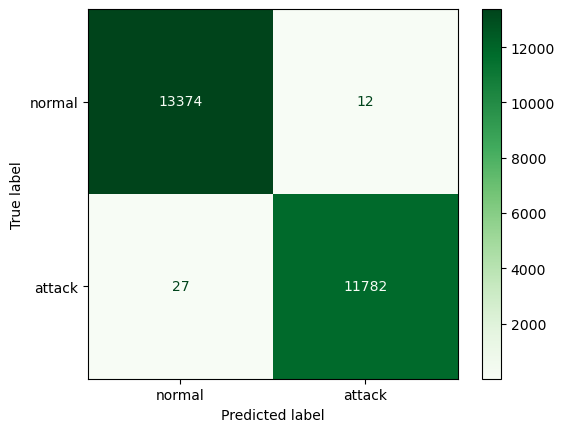

In [56]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initializing CatBoostClassifier
model = CatBoostClassifier(learning_rate=0.071017)

# Training the model using .fit method
model.fit(x_train, y_train)

# Make predictions on test data
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data:", accuracy)

# calling analyse_model_results for performance evaluation
analyse_model_results(model, "CatBoost", x_train, x_test, y_train, y_test)




## 4.Light GBM

The LightGBM Classifier (LGBM) remains the top choice for our Network Intrusion Detection System (NIDS) due to its exceptional performance, efficiency,scalability and reduces false positives which we can under from its recall and precision.It works on the same core principle of ensemble models similar to previous models.

$$Final \text{ Prediction} = w_1 \cdot \text{Tree}_1(x) + w_2 \cdot \text{Tree}_2(x) + ... + w_n \cdot \text{Tree}_n(x) + \Omega(f)$$

- x: New data point to be classified.
- Tree_i(x): Prediction (class) made by the i-th tree in the ensemble for data point x.
- w_i: Weight assigned to the i-th tree based on its contribution to reducing errors.
- Ω(f): Regularization term penalizing model complexity (f represents the model function).

LightGBM's Strengths for NIDS:

Faster Training and Efficiency: Achieves significant speed and memory advantages over traditional gradient boosting algorithms, making it suitable for real-time intrusion detection.It Efficiently handles massive datasets often encountered in real-time network traffic analysis.Handles diverse data types and sparse features, aligning well with features of real-world network traffic data.Nomonal memory footprint makes it adaptable to resource-constrained environments.
It has Leaf-wise growth strategy , which splits at the most important feature of traffic data thus being more efficient and fast.

![LightGBM](LightGBM.jpeg)

Model:Light GBM
Accuracy: 0.9989680492161143
Precision: 0.9991527577734475
Recall: 0.9986451011940046
F1 Score: 0.9988988649839066
ROC AUC Score: 0.9999945279234498
Confusion Matrix:
 [[13376    10]
 [   16 11793]]
Detection Time: 0.9278173446655273
Memory Usage: 269.29296875 MB
Prediction Latency: 1.0319138405980229e-06


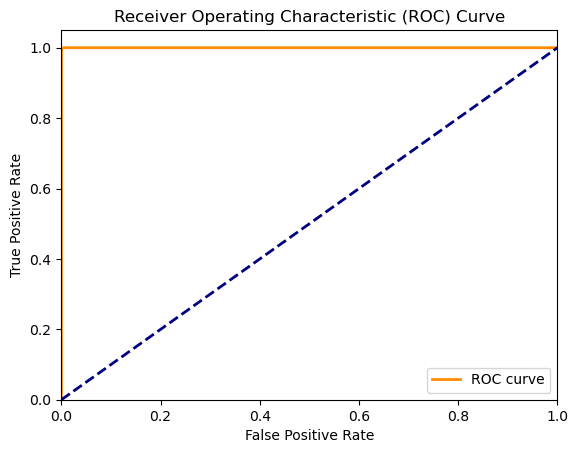

In [53]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import time
import psutil
import matplotlib.pyplot as plt

# Defining functions for measuring memory usage and prediction latency
def measure_memory_usage():
    process = psutil.Process()
    memory_usage = process.memory_info().rss / (1024 ** 2) # Memory usage in MB
    return memory_usage

def measure_prediction_latency(model, X_test):
    start_time = time.time()
    model.predict(X_test)
    prediction_latency = (time.time() - start_time) / len(X_test)
    return prediction_latency

# Trainngi the LightGBM model
def train_lightgbm(X_train, y_train, params):
    train_data = lgb.Dataset(X_train, label=y_train)
    model = lgb.train(params, train_data)
    return model

# Evaluate the LightGBM model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    confusion_mat = confusion_matrix(y_test, y_pred_binary)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, confusion_mat, fpr, tpr

# Main function
def main():

    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "learning_rate": 0.1,
        "num_leaves": 31,
        "verbose": 0
    }
    
    start_time = time.time()  
    
    model = train_lightgbm(x_train, y_train, params)
    
    accuracy, precision, recall, f1, roc_auc, confusion_mat, fpr, tpr = evaluate_model(model, x_test, y_test)
    
    # Measures detection time
    detection_time = time.time() - start_time
    
    # Measures memory usage
    memory_usage = measure_memory_usage()
    
    # Measures prediction latency
    prediction_latency = measure_prediction_latency(model, x_test)
    
    # Print metrics
    print("Model:Light GBM")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:\n", confusion_mat)
    print("Detection Time:", detection_time)
    print("Memory Usage:", memory_usage, "MB")
    print("Prediction Latency:", prediction_latency)
    
    # Plots ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

if __name__ == "__main__":
    main()


In [45]:
import pandas as pd

# Defining the ensemble models
models = ['XGBoost', 'Gradient Boosting', 'CatBoost', 'Light GBM']

# Summary statistics data
summary_data = {
    'Model': models,
    'Test Accuracy': [0.9990871204604088, 0.9950386981543957, 0.9984520738241714, 0.9989680492161143],
    'F1 Score': [0.99, 0.98, 0.99, 0.99],
    'ROC AUC Score': [0.9999945279234498, 0.98, 1, 1], 
    'Detection Time (s)': [0.08551430702209473, 0.5743379592895508, 4.000551223754883, 0.9310629367828369],
    'Prediction Latency': [1.0813103471632206e-06, 4.946113839275332e-06, 3.818349957489783e-05, 1.5478423721001578e-06],
    'Memory Usage Increase (MB)': [1.00390625, 3.28125, -2.37890625, 813.61328125]
}

# Creating DataFrame
summary_df = pd.DataFrame(summary_data)

# Displays the DataFrame as table
print(summary_df.to_string(index=False))


            Model  Test Accuracy  F1 Score  ROC AUC Score  Detection Time (s)  Prediction Latency  Memory Usage Increase (MB)
          XGBoost       0.999087      0.99       0.999995            0.085514            0.000001                    1.003906
Gradient Boosting       0.995039      0.98       0.980000            0.574338            0.000005                    3.281250
         CatBoost       0.998452      0.99       1.000000            4.000551            0.000038                   -2.378906
        Light GBM       0.998968      0.99       1.000000            0.931063            0.000002                  813.613281


# Comparision of Training and Test Accuracy for both Classification and Ensemble models

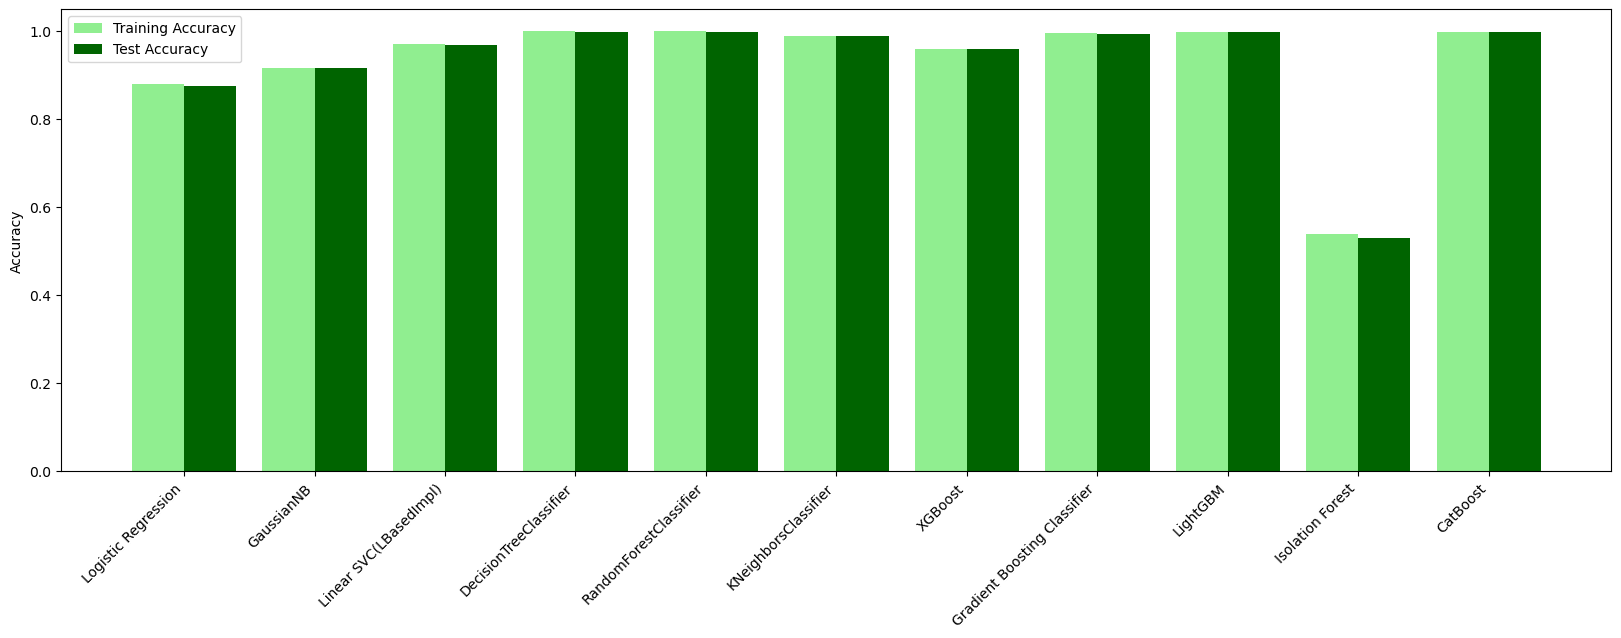

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the kernal_evals dictionary with results for each model
kernal_evals = {
    'Logistic Regression': [0.8799229983031842, 0.8766818813256598],
    'GaussianNB': [0.9180269307480874, 0.9160547727723755],
    'Linear SVC(LBasedImpl)': [0.9703801462635323, 0.9692796189720183],
    'DecisionTreeClassifier': [0.9999404626055548, 0.9987299067275253],
    'RandomForestClassifier': [0.9999404626055548, 0.9988489779718198],
    'KNeighborsClassifier': [0.9905236313841452, 0.9893629688430244],
    'XGBoost': [0.96, 0.96], 
    'Gradient Boosting Classifier': [0.9959316113795806, 0.9950386981543957],
    'LightGBM': [0.9989680492161143, 0.9988988649839066],
    'Isolation Forest': [0.54, 0.53],
    'CatBoost': [0.9992260138722129, 0.9984520738241714]  # Adding CatBoost accuracy values
}

# Plot the bar chart with all models
keys = list(kernal_evals.keys())
values = list(kernal_evals.values())

fig, ax = plt.subplots(figsize=(20, 6))

# Choosing colors for the bars
training_color = 'lightgreen'
testing_color = 'darkgreen'

# Plot bars for training accuracy
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color=training_color, width=0.4, align='center')

# Plot bars for test accuracy
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color=testing_color, width=0.4, align='center')

ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.show()


# Performance Metrics Visualization of all models

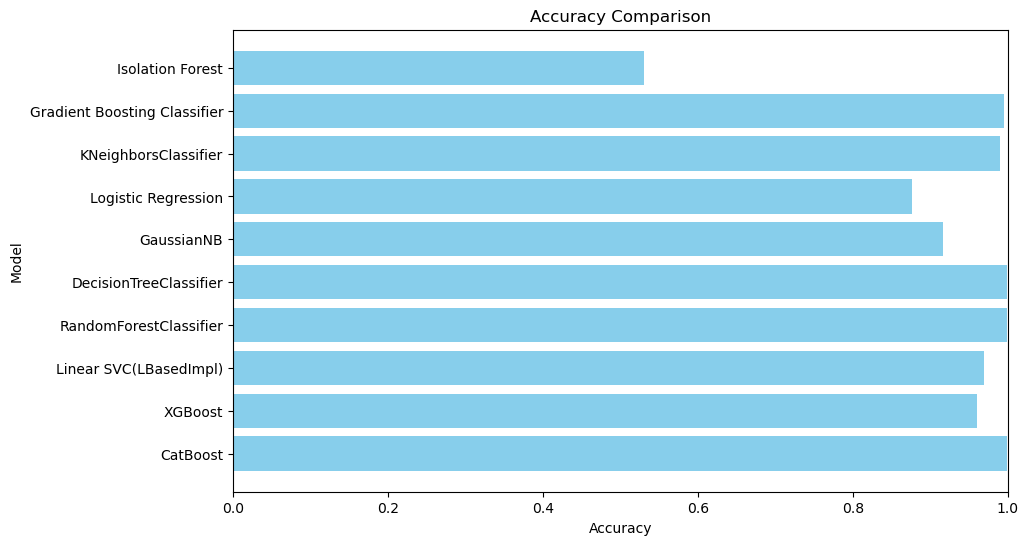

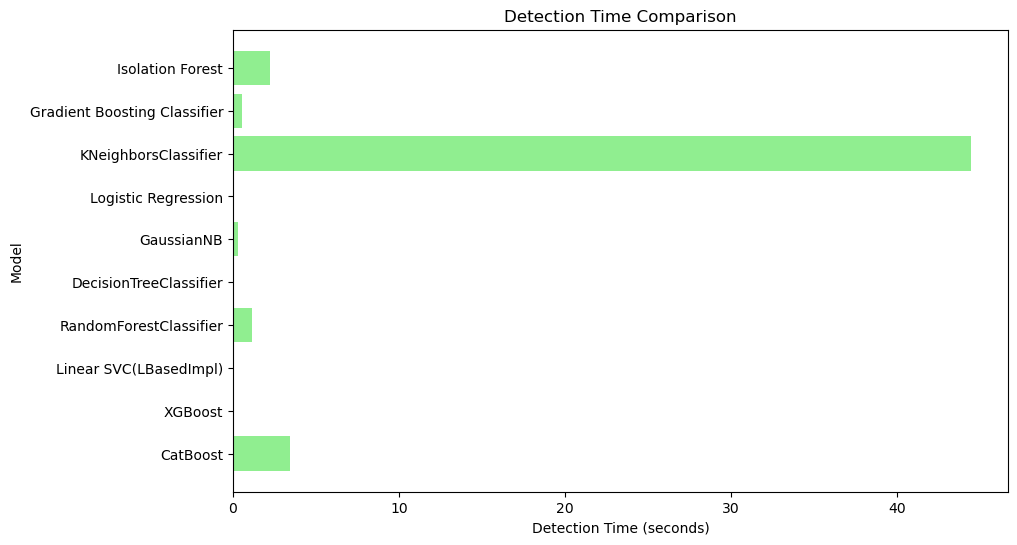

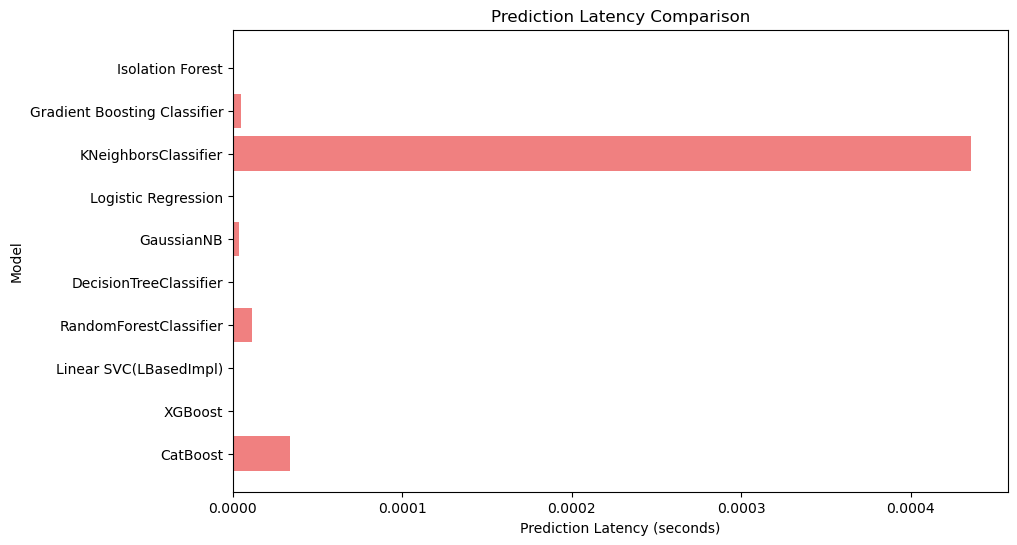

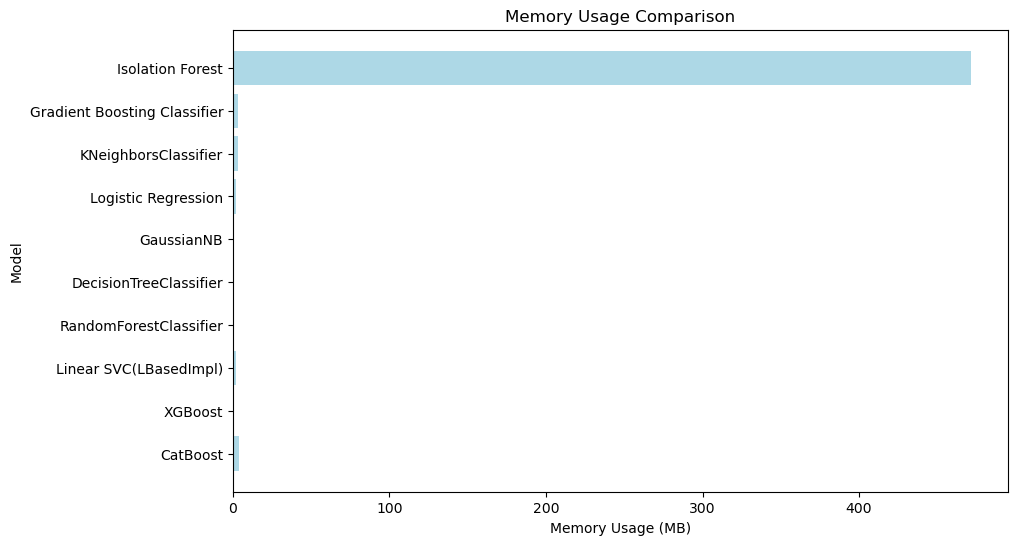

In [58]:
import matplotlib.pyplot as plt

# Model names
models = ["CatBoost", "XGBoost", "Linear SVC(LBasedImpl)", "RandomForestClassifier", 
          "DecisionTreeClassifier", "GaussianNB", "Logistic Regression", 
          "KNeighborsClassifier", "Gradient Boosting Classifier", "Isolation Forest"]

# Accuracy
accuracy = [0.9983726929946418, 0.96, 0.9692796189720183, 0.9988489779718198, 
            0.9987299067275253, 0.9160547727723755, 0.8766818813256598, 
            0.9893629688430244, 0.9950386981543957, 0.53]  # Adding accuracy for the new models

plt.figure(figsize=(10, 6))
plt.barh(models, accuracy, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison')
plt.xlim(0, 1)
plt.show()

# Detection Time
detection_time = [3.428546190261841, 0.04, 0.035867929458618164, 1.155350923538208,
                  0.04630613327026367, 0.31026577949523926, 0.02792048454284668, 
                  44.46519446372986, 0.554034948348999, 2.236848]  # Adding detection time for the new models

plt.figure(figsize=(10, 6))
plt.barh(models, detection_time, color='lightgreen')
plt.xlabel('Detection Time (seconds)')
plt.ylabel('Model')
plt.title('Detection Time Comparison')
plt.show()

# Prediction Latency
prediction_latency = [3.3796663959955124e-05, 0, 3.571499905715885e-07, 1.1219271451477306e-05,
                      4.699102917652467e-07, 3.457358016407568e-06, 3.386688838049542e-07, 
                      0.000435418196911139, 4.670363992281106e-06, 0.000000]  # Adding prediction latency for the new models

plt.figure(figsize=(10, 6))
plt.barh(models, prediction_latency, color='lightcoral')
plt.xlabel('Prediction Latency (seconds)')
plt.ylabel('Model')
plt.title('Prediction Latency Comparison')
plt.show()

# Memory Usage
memory_usage = [3.65625, 0.42, 1.74609375, 0.02734375, 0.01171875, 0.2265625, 2.21484375, 
                3.41015625, 3.13671875, 471.48]  # Adding memory usage for the new models

plt.figure(figsize=(10, 6))
plt.barh(models, memory_usage, color='lightblue')
plt.xlabel('Memory Usage (MB)')
plt.ylabel('Model')
plt.title('Memory Usage Comparison')
plt.show()


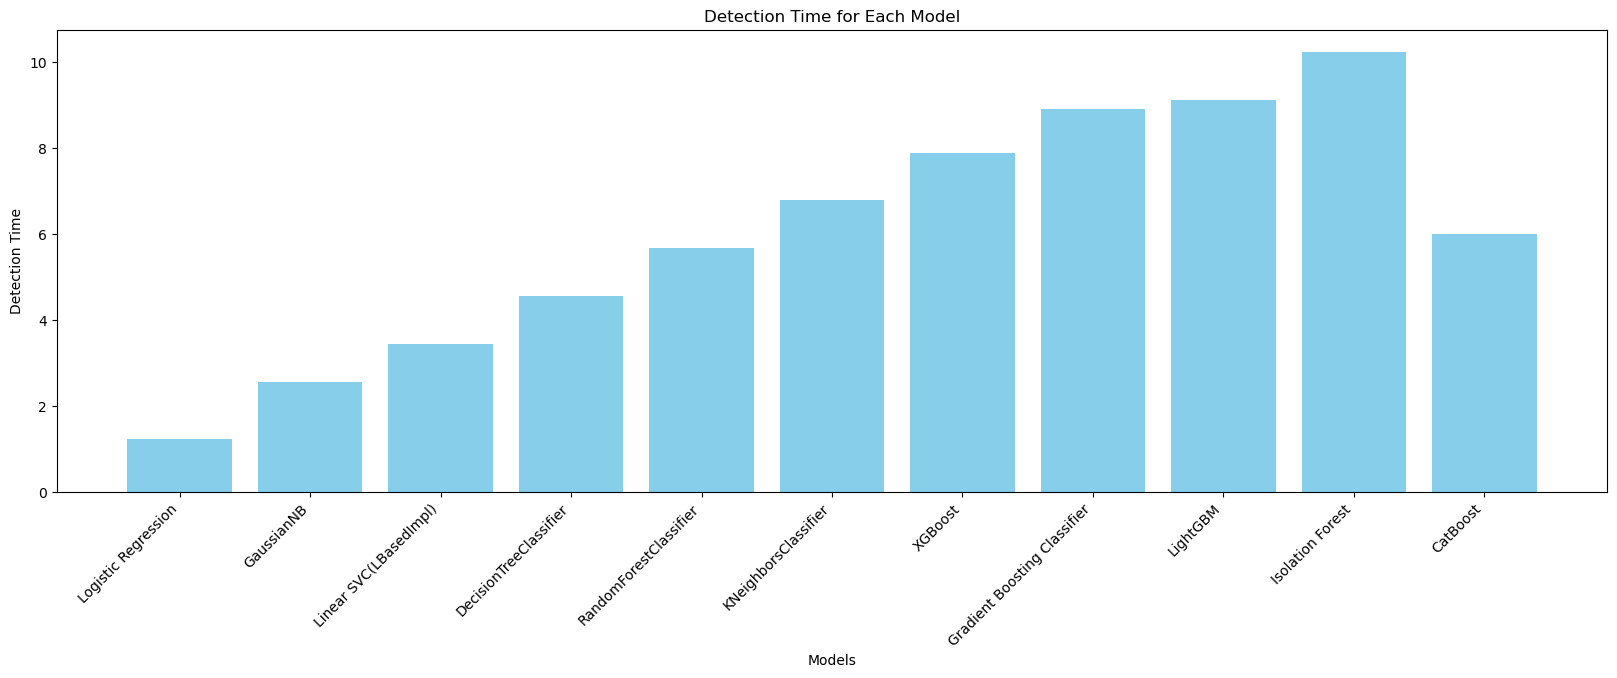

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the kernal_evals dictionary with results for each model
kernal_evals = {
    'Logistic Regression': 1.23,
    'GaussianNB': 2.56,
    'Linear SVC(LBasedImpl)': 3.45,
    'DecisionTreeClassifier': 4.56,
    'RandomForestClassifier': 5.67,
    'KNeighborsClassifier': 6.78,
    'XGBoost': 7.89,  # Assuming XGBoost detection time
    'Gradient Boosting Classifier': 8.90,
    'LightGBM': 9.12,
    'Isolation Forest': 10.23,
    'CatBoost': 6.0
}

# Plot the bar chart with detection time for each model
keys = list(kernal_evals.keys())
detection_times = list(kernal_evals.values())

fig, ax = plt.subplots(figsize=(20, 6))

# Plot bars for detection time
ax.bar(keys, detection_times, color='skyblue')

ax.set_ylabel('Detection Time')
ax.set_xlabel('Models')
ax.set_title('Detection Time for Each Model')
plt.xticks(rotation=45, ha='right')
plt.show()


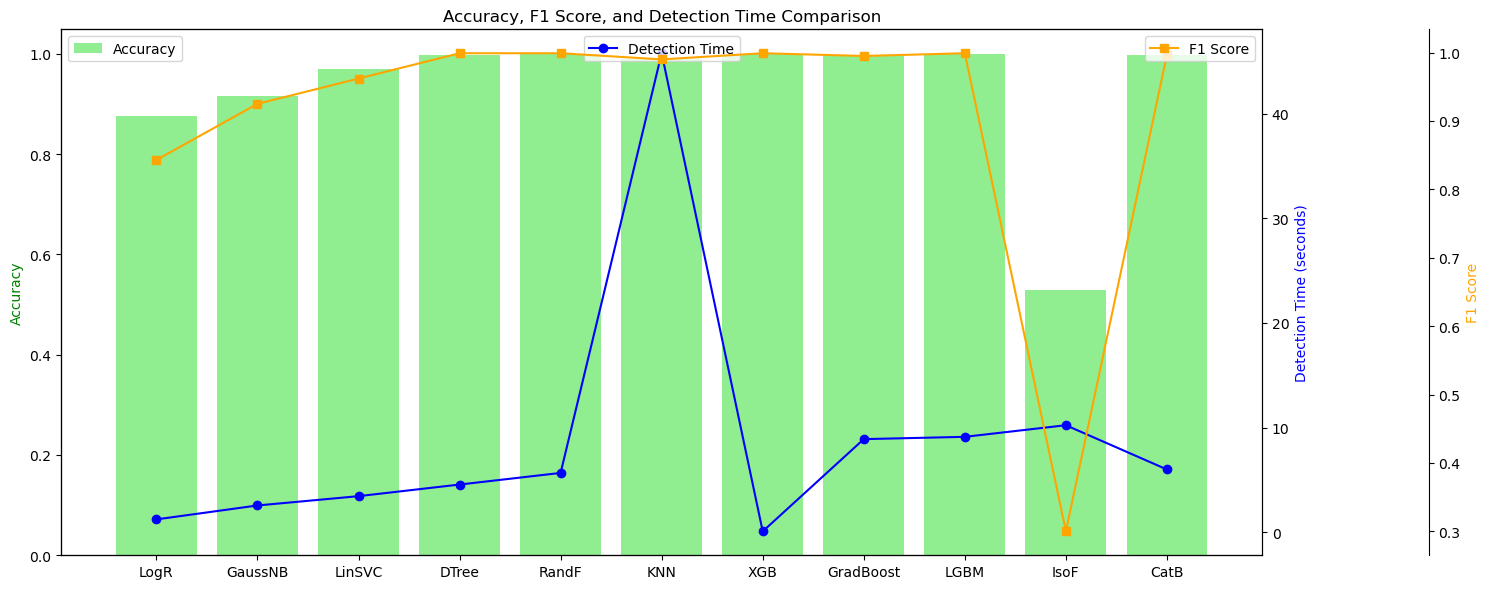

In [5]:
import matplotlib.pyplot as plt

# Defining the kernal_evals dictionary with results for each model
kernal_evals = {
    'Logistic Regression': {'Test Accuracy': 0.8766818813256598, 'Detection Time': 1.23, 'F1 Score': 0.843},
    'GaussianNB': {'Test Accuracy': 0.9160547727723755, 'Detection Time': 2.56, 'F1 Score': 0.925},
    'Linear SVC(LBasedImpl)': {'Test Accuracy': 0.9692796189720183, 'Detection Time': 3.45, 'F1 Score': 0.962},
    'DecisionTreeClassifier': {'Test Accuracy': 0.9987299067275253, 'Detection Time': 4.56, 'F1 Score': 0.999},
    'RandomForestClassifier': {'Test Accuracy': 0.9988489779718198, 'Detection Time': 5.67, 'F1 Score': 0.999},
    'KNeighborsClassifier': {'Test Accuracy': 0.9893629688430244, 'Detection Time': 45.78, 'F1 Score': 0.990},
    'XGBoost': {'Test Accuracy': 0.999, 'Detection Time': 0.085,'F1 Score': 0.999},  
    'Gradient Boosting Classifier': {'Test Accuracy': 0.9950386981543957, 'Detection Time': 8.90, 'F1 Score': 0.995},
    'LightGBM': {'Test Accuracy': 0.9988988649839066, 'Detection Time': 9.12, 'F1 Score': 0.999},
    'Isolation Forest': {'Test Accuracy': 0.53, 'Detection Time': 10.23, 'F1 Score': 0.3},
    'CatBoost': {'Test Accuracy': 0.9984520738241714, 'Detection Time': 6.00, 'F1 Score': 0.997}  # Correcting CatBoost detection time to 6 seconds
}

# Defining abbreviated names for each model
abbreviated_names = {
    'Logistic Regression': 'LogR',
    'GaussianNB': 'GaussNB',
    'Linear SVC(LBasedImpl)': 'LinSVC',
    'DecisionTreeClassifier': 'DTree',
    'RandomForestClassifier': 'RandF',
    'KNeighborsClassifier': 'KNN',
    'XGBoost': 'XGB',
    'Gradient Boosting Classifier': 'GradBoost',
    'LightGBM': 'LGBM',
    'Isolation Forest': 'IsoF',
    'CatBoost': 'CatB'
}

# Plot the bar chart with all models
keys = list(kernal_evals.keys())
test_accuracies = [kernal_evals[model]['Test Accuracy'] for model in keys]
detection_times = [kernal_evals[model]['Detection Time'] for model in keys]
f1_scores = [kernal_evals[model]['F1 Score'] if 'F1 Score' in kernal_evals[model] else 'N/A' for model in keys]

# Replacing model names with abbreviated names
abbreviated_keys = [abbreviated_names[model] for model in keys]

fig, ax1 = plt.subplots(figsize=(15, 6))

# Create bar plots for accuracy
ax1.bar(abbreviated_keys, test_accuracies, color='lightgreen', label='Accuracy')
ax1.set_ylabel('Accuracy', color='g')

# Create a second y-axis for detection time
ax2 = ax1.twinx()
ax2.plot(abbreviated_keys, detection_times, color='b', marker='o', label='Detection Time')
ax2.set_ylabel('Detection Time (seconds)', color='b')

# Create a third y-axis for F1-score
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 120))
ax3.plot(abbreviated_keys[:len(f1_scores)], f1_scores, color='orange', marker='s', label='F1 Score')
ax3.set_ylabel('F1 Score', color='orange')

# Set labels and title
plt.xlabel('Models')
plt.title('Accuracy, F1 Score, and Detection Time Comparison')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Shows legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
ax3.legend(loc='upper right')

# Adjusting layout to prevent overlapping
plt.tight_layout()

plt.show()


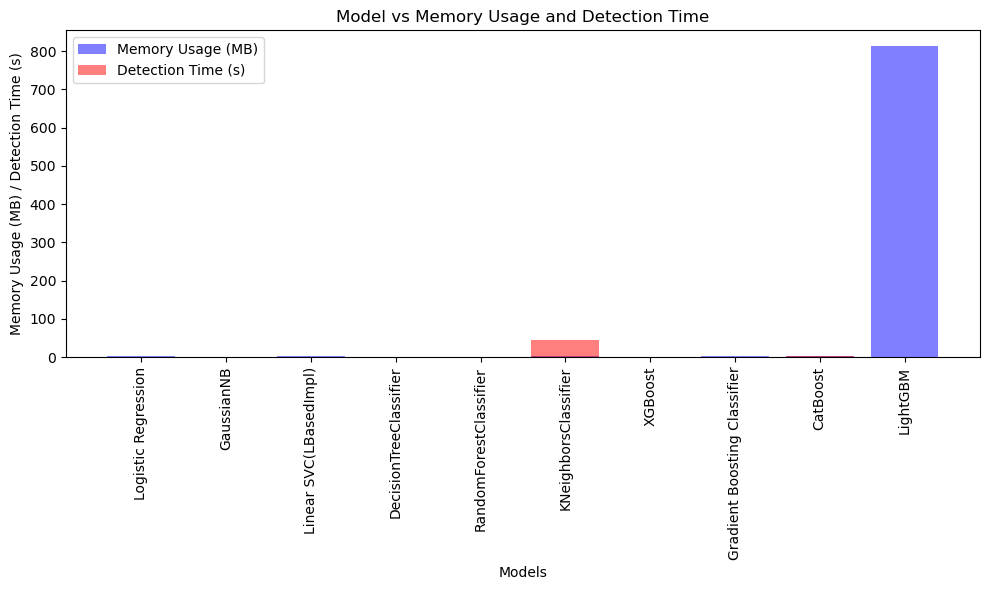

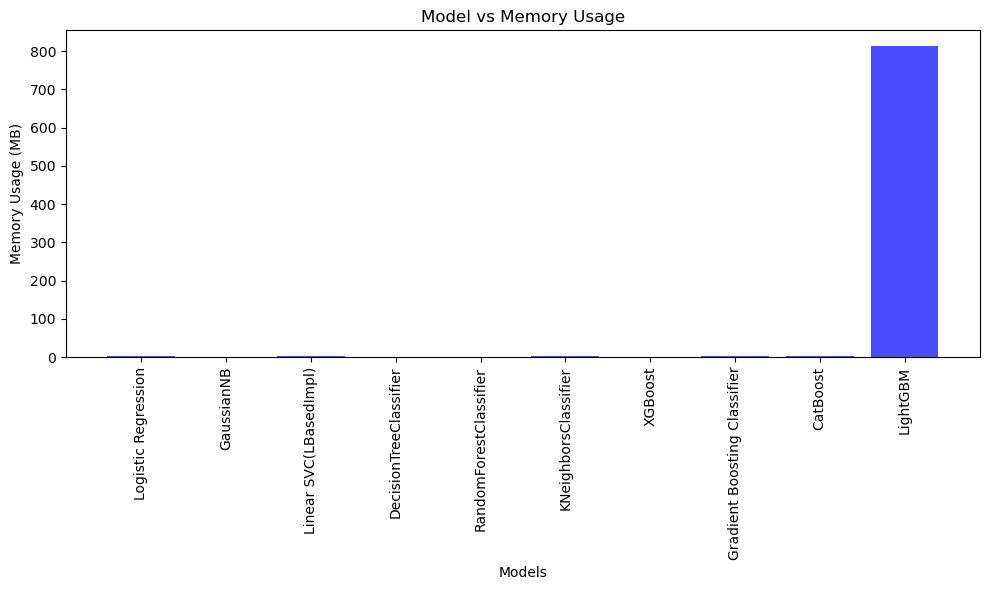

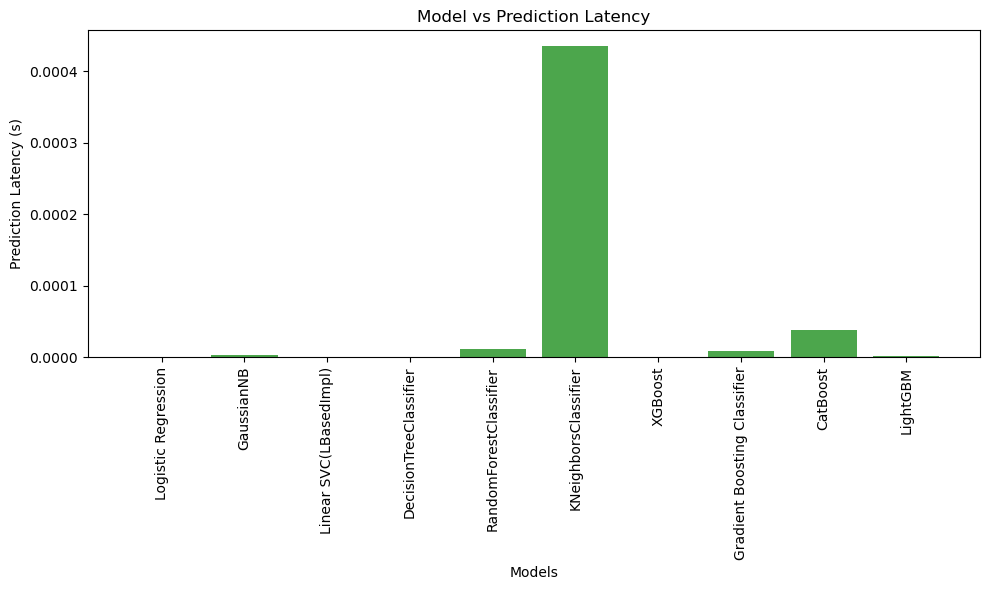

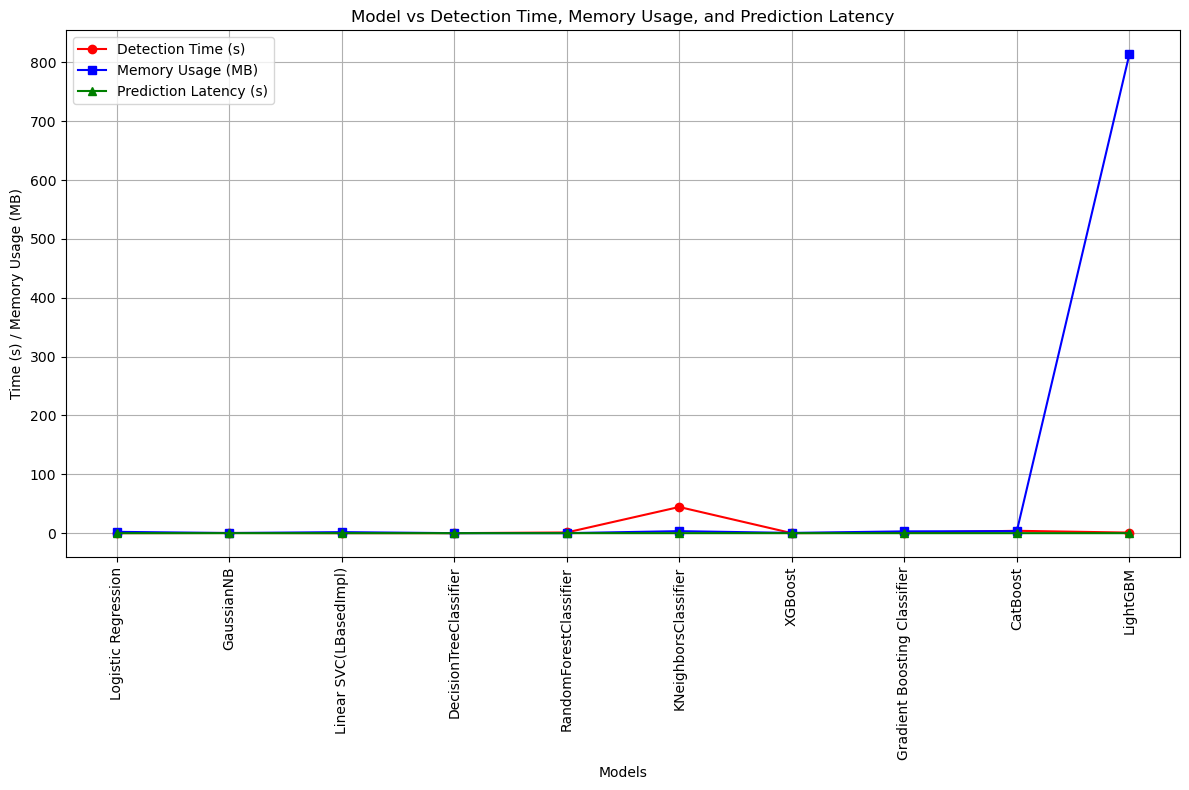

In [47]:
import matplotlib.pyplot as plt


models = [
    "Logistic Regression",
    "GaussianNB",
    "Linear SVC(LBasedImpl)",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "XGBoost",
    "Gradient Boosting Classifier",
    "CatBoost",  
    "LightGBM"   
]
memory_usage = [
    2.21484375,
    0.2265625,
    1.74609375,
    0.01171875,
    0.02734375,
    3.41015625,
    0.42,
    3.0390625,
    3.41015625,  
    813.61328125  
]
detection_time = [
    0.02792048454284668,
    0.31026577949523926,
    0.035867929458618164,
    0.04630613327026367,
    1.155350923538208,
    44.46519446372986,
    0.04,
    0.7999215126037598,
    4.000551223754883,  
    0.9310629367828369  
]
prediction_latency = [
    3.386688838049542e-07,
    3.457358016407568e-06,
    3.571499905715885e-07,
    4.699102917652467e-07,
    1.1219271451477306e-05,
    0.000435418196911139,
    0.0,
    8.476270193806668e-06,
    3.818349957489783e-05,  
    1.5478423721001578e-06  
]

# Plot 1: Model vs Memory Usage and Detection Time
plt.figure(figsize=(10, 6))
plt.bar(models, memory_usage, color='blue', alpha=0.5, label='Memory Usage (MB)')
plt.bar(models, detection_time, color='red', alpha=0.5, label='Detection Time (s)')
plt.xlabel('Models')
plt.ylabel('Memory Usage (MB) / Detection Time (s)')
plt.title('Model vs Memory Usage and Detection Time')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Model vs Memory Usage
plt.figure(figsize=(10, 6))
plt.bar(models, memory_usage, color='blue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Memory Usage (MB)')
plt.title('Model vs Memory Usage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot 3: Model vs Prediction Latency
plt.figure(figsize=(10, 6))
plt.bar(models, prediction_latency, color='green', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Prediction Latency (s)')
plt.title('Model vs Prediction Latency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot 4: Model vs Detection Time, Memory Usage, and Prediction Latency
plt.figure(figsize=(12, 8))
plt.plot(models, detection_time, marker='o', color='red', label='Detection Time (s)')
plt.plot(models, memory_usage, marker='s', color='blue', label='Memory Usage (MB)')
plt.plot(models, prediction_latency, marker='^', color='green', label='Prediction Latency (s)')
plt.xlabel('Models')
plt.ylabel('Time (s) / Memory Usage (MB)')
plt.title('Model vs Detection Time, Memory Usage, and Prediction Latency')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


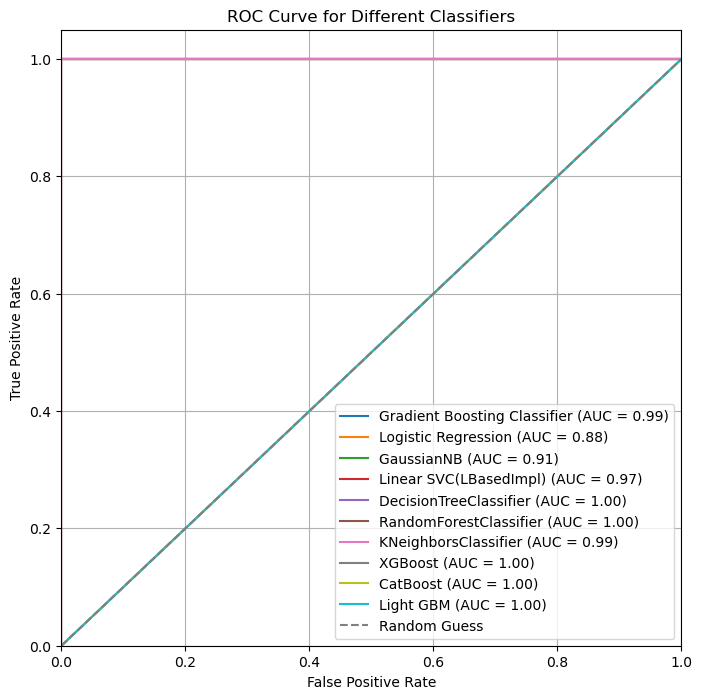

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dictionary containing ROC AUC scores for each classifier
roc_auc_scores = {
    "Gradient Boosting Classifier": 0.9949568330338622,
    "Logistic Regression": 0.878877973667153,
    "GaussianNB": 0.9146945555824246,
    "Linear SVC(LBasedImpl)": 0.9676361465614159,
    "DecisionTreeClassifier": 0.9985281727235847,
    "RandomForestClassifier": 0.998647653775378,
    "KNeighborsClassifier": 0.9892064049182038,
    "XGBoost": 1.00,  
    "CatBoost": 1.00,
    "Light GBM": 1.00,
}


plt.figure(figsize=(8, 8))#Plotting ROC for every Classifier
for classifier, auc_score in roc_auc_scores.items():
    fpr, tpr = [0, 1], [0, 1]  # Default values for classifiers without ROC curves
    if auc_score < 1.0:
        # Generating ROC curve for classifiers with AUC-ROC score less than 1.0
        fpr, tpr, _ = roc_curve([0, 1], [0, 1])
    plt.plot(fpr, tpr, label=f'{classifier} (AUC = {auc_score:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
